<a href="https://colab.research.google.com/github/RodriCouto/EMI-JupyterNotebooks/blob/main/ProjetoICD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project

---

Miguel Gonçalves nº202107127

Rodrigo Couto nº202104696

Marta Campos nº202008344

---

# Introduction

This is a database from US customers, this project aims to predict health insurance coverage based on several customer characteristics such as age, employment status, income, residential details, and vehicle ownership.

Here is going to be all the imports needed for the

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import LabelEncoder

In [237]:
df = pd.read_csv("/content/sample_data/customer.csv", sep=",")
df.head()

display(df.describe())


,Unnamed: 0,income,num_vehicles,age,code_column,gas_usage,rooms
count,72458.000000,7.245800e+04,70772.000000,72458.000000,72458.000000,70772.000000,72458.000000
mean,49910.637556,4.188143e+04,2.066820,49.208893,3285.523572,41.230501,3.494549
std,28772.082702,5.827460e+04,1.170076,18.090035,2661.775225,63.149323,1.706537
min,7.000000,-6.900000e+03,0.000000,0.000000,131.000000,1.000000,1.000000
25%,24911.250000,1.070000e+04,1.000000,34.000000,1305.000000,3.000000,2.000000
50%,49838.000000,2.640000e+04,2.000000,48.000000,2269.000000,10.000000,3.000000
75%,74786.750000,5.200000e+04,3.000000,62.000000,4979.000000,60.000000,5.000000
max,100000.000000,1.257000e+06,6.000000,120.000000,8962.000000,570.000000,6.000000


In [208]:
df.columns

Index(['Unnamed: 0', 'custid', 'sex', 'is_employed', 'income',
       'marital_status', 'health_ins', 'housing_type', 'num_vehicles', 'age',
       'state_of_res', 'code_column', 'gas_usage', 'rooms', 'recent_move_b'],
      dtype='object')

As colunas 'Unnamed: 0' e 'custid' são irrelevantes, por isso podemos retira-las. Vamos também normalizar as colunas com valores muito elevados retirando depois as colunas iniciais. Ao 'income' e ao 'code_column' vamos aplicar o logaritmo para diminuir as diferentes entre valores (variância).

Análise inicial das variáveis

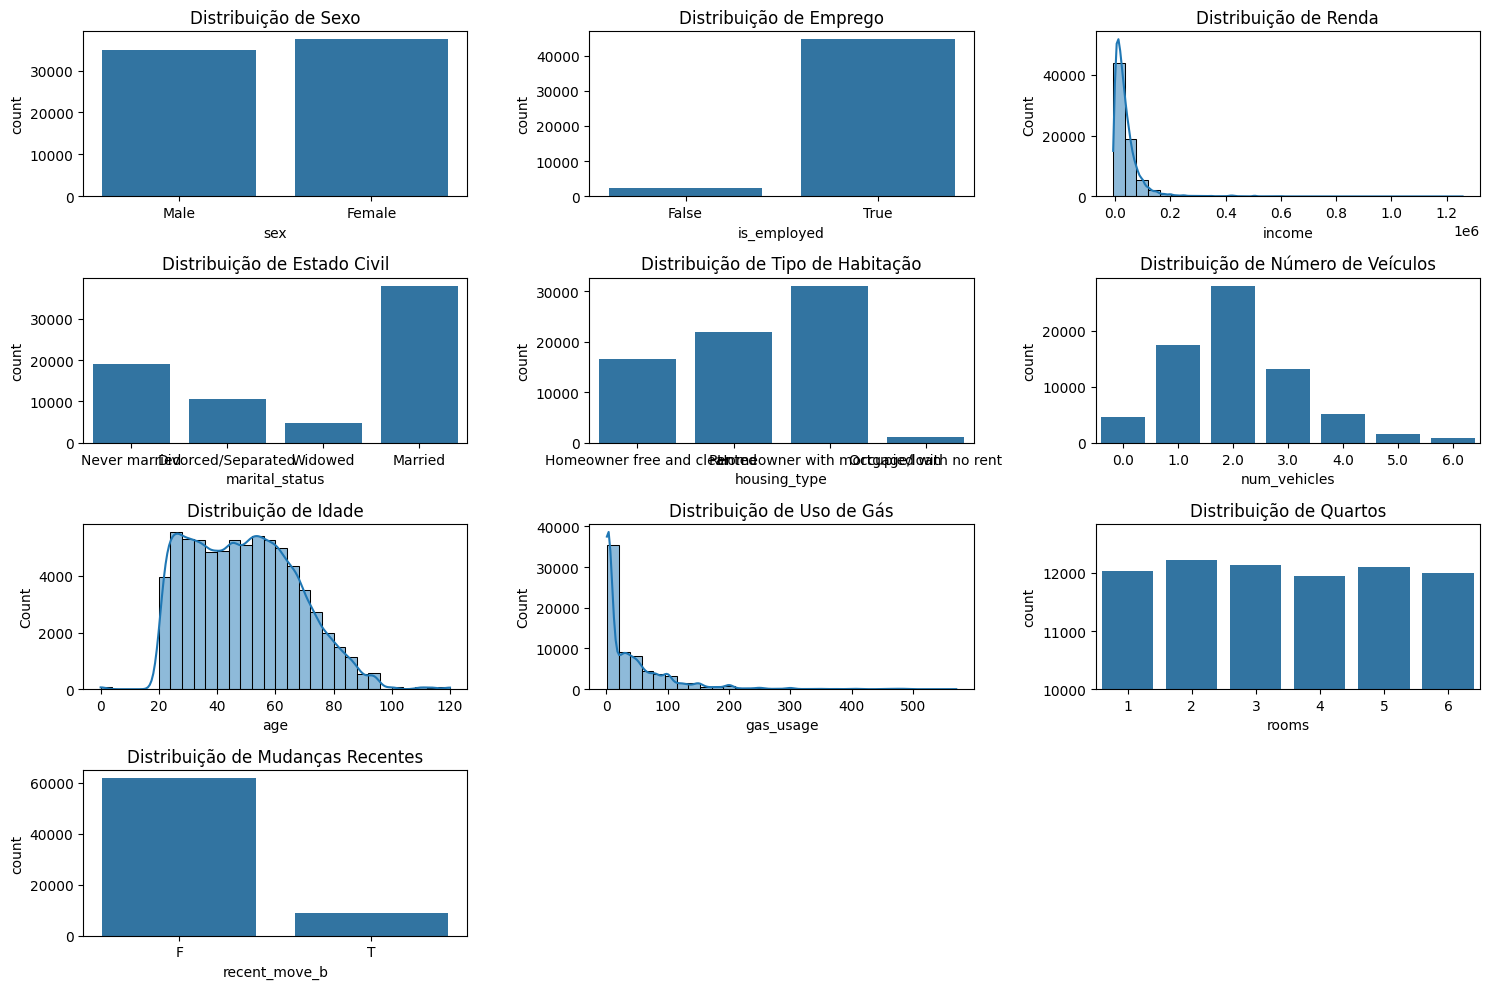

In [209]:
# Configura o tamanho dos gráficos
plt.figure(figsize=(15, 10))

# Gráfico para a variável 'sex'
plt.subplot(4, 3, 1)
sns.countplot(data=df, x='sex')
plt.title('Distribuição de Sexo')

# Gráfico para a variável 'is_employed'
plt.subplot(4, 3, 2)
sns.countplot(data=df, x='is_employed')
plt.title('Distribuição de Emprego')

# Gráfico para a variável 'income'
plt.subplot(4, 3, 3)
sns.histplot(data=df, x='income', bins=30, kde=True)
plt.title('Distribuição de Renda')

# Gráfico para a variável 'marital_status'
plt.subplot(4, 3, 4)
sns.countplot(data=df, x='marital_status')
plt.title('Distribuição de Estado Civil')

# Gráfico para a variável 'housing_type'
plt.subplot(4, 3, 5)
sns.countplot(data=df, x='housing_type')
plt.title('Distribuição de Tipo de Habitação')

# Gráfico para a variável 'num_vehicles'
plt.subplot(4, 3, 6)
sns.countplot(data=df, x='num_vehicles')
plt.title('Distribuição de Número de Veículos')

# Gráfico para a variável 'age'
plt.subplot(4, 3, 7)
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.title('Distribuição de Idade')

# Gráfico para a variável 'gas_usage'
plt.subplot(4, 3, 8)
sns.histplot(data=df, x='gas_usage', bins=30, kde=True)
plt.title('Distribuição de Uso de Gás')

# Gráfico para a variável 'rooms'
plt.subplot(4, 3, 9)
sns.countplot(data=df, x='rooms')
plt.title('Distribuição de Quartos')
plt.ylim(10000, plt.ylim()[1])

# Gráfico para a variável 'recent_move_b'
plt.subplot(4, 3, 10)
sns.countplot(data=df, x='recent_move_b')
plt.title('Distribuição de Mudanças Recentes')

# Ajusta o layout
plt.tight_layout()
plt.show()


Vamos agora tratar dos valores nulos.

In [238]:
pd.set_option('display.max_rows', None)
for column in df.columns:
    null_count = df[column].isnull().sum()
    print(f"{column}: {null_count} null values")

num_linhas_age_0 = df[df['age'] == 0].shape[0]
print("Número de linhas com age igual a 0:", num_linhas_age_0)


Unnamed: 0: 0 null values
custid: 0 null values
sex: 0 null values
is_employed: 25515 null values
income: 0 null values
marital_status: 0 null values
health_ins: 0 null values
housing_type: 1686 null values
num_vehicles: 1686 null values
age: 0 null values
state_of_res: 0 null values
code_column: 0 null values
gas_usage: 1686 null values
rooms: 0 null values
recent_move_b: 1687 null values
Número de linhas com age igual a 0: 77


Vamos transformar a variavel 'is_employed' com one-hot-encoding, uma vez que nao podemos eliminar os nulls dessa variavel, porque eles representam os reformados.

In [239]:
df_encoded = pd.get_dummies(df, columns=['is_employed'], drop_first=False)
df_encoded.head()


,Unnamed: 0,custid,sex,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b,is_employed_False,is_employed_True
0,7,000006646_03,Male,22000.0,Never married,True,Homeowner free and clear,0.0,24,Alabama,1047,210.0,3,F,False,True
1,8,000007827_01,Female,23200.0,Divorced/Separated,True,Rented,0.0,82,Alabama,1047,3.0,6,T,False,False
2,9,000008359_04,Female,21000.0,Never married,True,Homeowner with mortgage/loan,2.0,31,Alabama,1047,40.0,3,F,False,True
3,10,000008529_01,Female,37770.0,Widowed,True,Homeowner free and clear,1.0,93,Alabama,1047,120.0,2,F,False,False
4,11,000008744_02,Male,39000.0,Divorced/Separated,True,Rented,2.0,67,Alabama,1047,3.0,2,F,False,True


In [240]:
pd.set_option('display.max_rows', None)
for column in df_encoded.columns:
    null_count = df_encoded[column].isnull().sum()
    print(f"{column}: {null_count} null values")

num_linhas_age_0 = df_encoded[df_encoded['age'] == 0].shape[0]
print("Número de linhas com age igual a 0:", num_linhas_age_0)

Unnamed: 0: 0 null values
custid: 0 null values
sex: 0 null values
income: 0 null values
marital_status: 0 null values
health_ins: 0 null values
housing_type: 1686 null values
num_vehicles: 1686 null values
age: 0 null values
state_of_res: 0 null values
code_column: 0 null values
gas_usage: 1686 null values
rooms: 0 null values
recent_move_b: 1687 null values
is_employed_False: 0 null values
is_employed_True: 0 null values
Número de linhas com age igual a 0: 77


Devido à coluna employed ter valores NA para representar a reforma, então vamos primeiro tratar desta coluna em especifico antes das outras.

In [241]:
print(1686/72458)

0.023268652184713905


2% de valores nulos então vamos retira-los todos

In [242]:
df_no_nulls = df_encoded.dropna()

df_no_nulls.drop(df_no_nulls[df_no_nulls['age'] == 0].index, inplace=True) #0 na idade é unknow, por isso tirar


<ipython-input-242-e41182590df4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_nulls.drop(df_no_nulls[df_no_nulls['age'] == 0].index, inplace=True) #0 na idade é unknow, por isso tirar


vamos agora ver quantos nulos há em cada coluna

In [243]:
print(df_no_nulls.isnull().sum())

pd.reset_option('display.max_rows')
print("Número de linhas com age igual a 0:", num_linhas_age_0)

Unnamed: 0           0
custid               0
sex                  0
income               0
marital_status       0
health_ins           0
housing_type         0
num_vehicles         0
age                  0
state_of_res         0
code_column          0
gas_usage            0
rooms                0
recent_move_b        0
is_employed_False    0
is_employed_True     0
dtype: int64
Número de linhas com age igual a 0: 77


In [244]:
df.shape[0]-df_no_nulls.shape[0]

1763

Vamos ver agora como é que se comportam os dados depois de normalizados. No caso, dos dados numéricos.

In [245]:
df = df_no_nulls

df.drop(['Unnamed: 0','custid'], axis=1, inplace=True)
scaler= StandardScaler()

# Supondo que df['income'] tenha valores negativos
min_income = df['income'].min()
df['income'] = df['income'] + abs(min_income) + 1  # Desloca para valores positivos

# Aplicando a normalização logarítmica
df['income'] = np.log(df['income'])

df['gas_usage'] = np.log(df['gas_usage'])
df['code_column'] = np.log(df['code_column'])

valores_a_normalizar=['age','num_vehicles','code_column','gas_usage','rooms', 'income']
df_normalizado=df.copy()
for coluna in valores_a_normalizar:
    df_normalizado[coluna]=scaler.fit_transform(df[coluna].values.reshape(-1,1))

<ipython-input-245-99b6dacc7ee6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Unnamed: 0','custid'], axis=1, inplace=True)
<ipython-input-245-99b6dacc7ee6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income'] = df['income'] + abs(min_income) + 1  # Desloca para valores positivos
<ipython-input-245-99b6dacc7ee6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

([0], [Text(0, 0, '')])

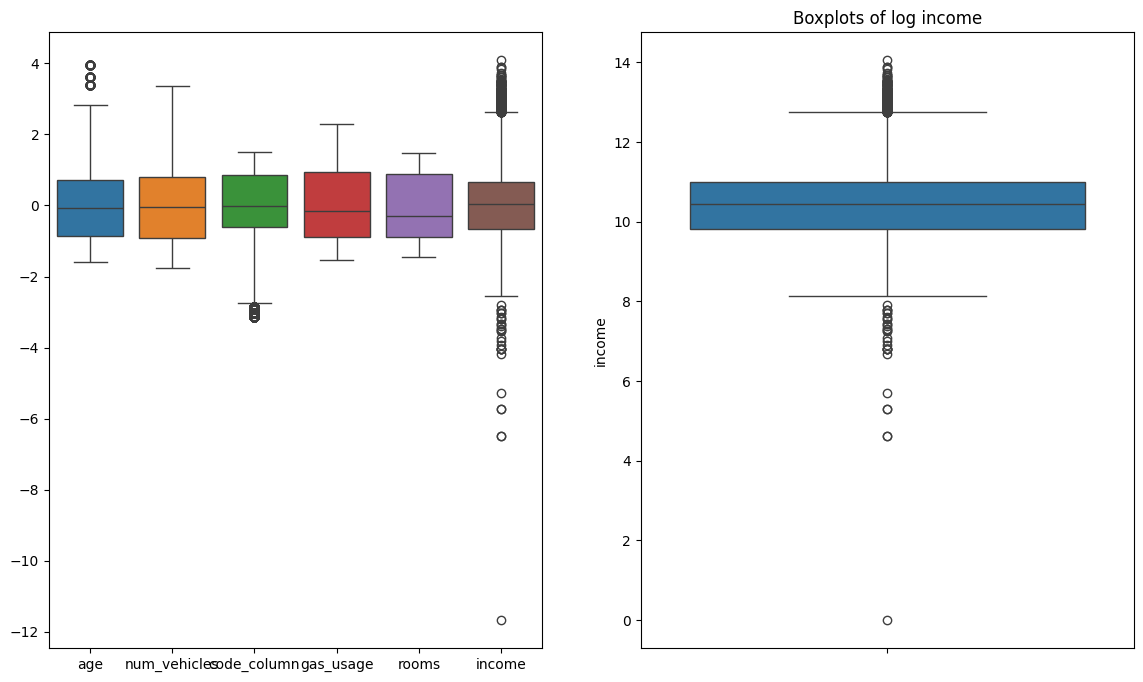

In [251]:
fig, axs = plt.subplots(1, 2, figsize=(14, 8))
sns.boxplot(data=df_normalizado[valores_a_normalizar], ax=axs[0])
plt.title("Boxplots of Customer Dataset Features")
plt.xticks(rotation=90)

sns.boxplot(data=df['income'], ax=axs[1])
plt.title("Boxplots of log income")
plt.xticks(rotation=90)



Vamos agora aplicar one-hot-encoding em todas as colunas necessárias uma vez que é mais fácil trabalhar com valores do que com texto.

In [248]:
#print("Unique categories in ",i, ":", df[i].unique())
df_encoded = pd.get_dummies(df_normalizado, columns=['marital_status'], drop_first=False)
df_encoded = pd.get_dummies(df_encoded, columns=['housing_type'], drop_first=False)
df_encoded = pd.get_dummies(df_encoded, columns=['state_of_res'], drop_first=False)

df_encoded = df_encoded.rename(columns={'state_of_res_Alabama':'Alabama','state_of_res_Alaska':'Alaska','state_of_res_Arizona':
       'Arizona', 'state_of_res_Arkansas': 'Arkansas', 'state_of_res_California':
       'California', 'state_of_res_Colorado': 'Colorado', 'state_of_res_Connecticut':
       'Connecticut', 'state_of_res_Delaware': 'Delaware', 'state_of_res_District of Columbia':
       'District of Columbia', 'state_of_res_Florida': 'Florida', 'state_of_res_Georgia': 'Georgia', 'state_of_res_Hawaii':
       'Hawaii', 'state_of_res_Idaho': 'Idaho', 'state_of_res_Illinois': 'Illinois', 'state_of_res_Indiana':
       'Indiana', 'state_of_res_Iowa': 'Iowa', 'state_of_res_Kansas': 'Kansas', 'state_of_res_Kentucky':
       'Kentucky', 'state_of_res_Louisiana': 'Louisiana', 'state_of_res_Maine': 'Maine', 'state_of_res_Maryland':
       'Maryland', 'state_of_res_Massachusetts': 'Massachusetts', 'state_of_res_Michigan':
       'Michigan', 'state_of_res_Minnesota': 'Minnesota', 'state_of_res_Mississippi':
       'Mississippi', 'state_of_res_Missouri': 'Missouri', 'state_of_res_Montana':
       'Montana', 'state_of_res_Nebraska': 'Nebraska', 'state_of_res_Nevada':
       'Nevada', 'state_of_res_New Hampshire': 'New Hampshire', 'state_of_res_New Jersey':
       'New Jersey', 'state_of_res_New Mexico': 'New Mexico', 'state_of_res_New York':
       'New York', 'state_of_res_North Carolina': 'North Carolina', 'state_of_res_North Dakota':
       'North Dakota', 'state_of_res_Ohio': 'Ohio', 'state_of_res_Oklahoma': 'Oklahoma', 'state_of_res_Oregon':
       'Oregon', 'state_of_res_Pennsylvania': 'Pennsylvania', 'state_of_res_Rhode Island':
       'Rhode Island', 'state_of_res_South Carolina': 'South Carolina', 'state_of_res_South Dakota':
       'South Dakota', 'state_of_res_Tennessee': 'Tennessee', 'state_of_res_Texas': 'Texas', 'state_of_res_Utah':
       'Utah', 'state_of_res_Vermont': 'Vermont', 'state_of_res_Virginia':
       'Virginia', 'state_of_res_Washington': 'Washington', 'state_of_res_West Virginia':
       'West Virginia', 'state_of_res_Wisconsin': 'Wisconsin', 'state_of_res_Wyoming': 'Wyoming',
       'marital_status_Divorced/Separated':'Divorced/Separated', 'marital_status_Married':'Married',
       'marital_status_Never married':'Never married', 'marital_status_Widowed':'Widowed',
       'housing_type_Homeowner free and clear':'Homeowner free and clear','housing_type_Homeowner with mortgage/loan':'Homeowner with mortgage/loan',
       'housing_type_Occupied with no rent':'Occupied with no rent', 'housing_type_Rented':'Rented','is_employed_True':'employed','is_employed_False':'unemployed'})
print(df_encoded.columns)

features_to_encode=['sex','health_ins','recent_move_b','employed','unemployed',
       'Divorced/Separated', 'Married',
       'Never married', 'Widowed',
       'Homeowner free and clear',
       'Homeowner with mortgage/loan',
       'Occupied with no rent', 'Rented',
       'Alabama', 'Alaska', 'Arizona',
       'Arkansas', 'California',
       'Colorado', 'Connecticut',
       'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii',
       'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi',
       'Missouri', 'Montana',
       'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey',
       'New Mexico', 'New York',
       'North Carolina', 'North Dakota',
       'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia',
       'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming']

label_encoder = LabelEncoder()
for feature in features_to_encode:
    df_encoded[feature] = label_encoder.fit_transform(df_encoded[feature])


display(df_encoded)


Index(['sex', 'income', 'health_ins', 'num_vehicles', 'age', 'code_column',
       'gas_usage', 'rooms', 'recent_move_b', 'unemployed', 'employed',
       'Divorced/Separated', 'Married', 'Never married', 'Widowed',
       'Homeowner free and clear', 'Homeowner with mortgage/loan',
       'Occupied with no rent', 'Rented', 'Alabama', 'Alaska', 'Arizona',
       'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       

,sex,income,health_ins,num_vehicles,age,code_column,gas_usage,rooms,recent_move_b,unemployed,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1,-0.148600,1,-1.766401,-1.413978,-0.860877,1.693532,-0.290099,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,-0.102960,1,-1.766401,1.831783,-0.860877,-0.875725,1.467825,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,-0.188104,1,-0.057250,-1.022248,-0.860877,0.690727,-0.290099,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.339907,1,-0.911825,2.447359,-0.860877,1.355107,-0.876073,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.370379,1,-0.057250,0.992362,-0.860877,-0.875725,-0.876073,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72452,0,1.149193,1,-0.057250,-0.966287,-3.141591,1.029152,0.881851,0,0,...,0,0,0,0,0,0,0,0,0,1
72453,0,-0.293416,0,-0.911825,-1.358016,-3.141591,-0.147628,0.295876,0,0,...,0,0,0,0,0,0,0,0,0,1
72454,0,-0.196174,1,-0.911825,2.055629,-3.141591,1.355107,1.467825,0,0,...,0,0,0,0,0,0,0,0,0,1
72455,1,1.019956,1,-0.057250,0.041019,-3.141591,1.181133,-0.290099,0,0,...,0,0,0,0,0,0,0,0,0,1


Mudamos os nomes das variáveis para serem mais intuitivas e legiveis.

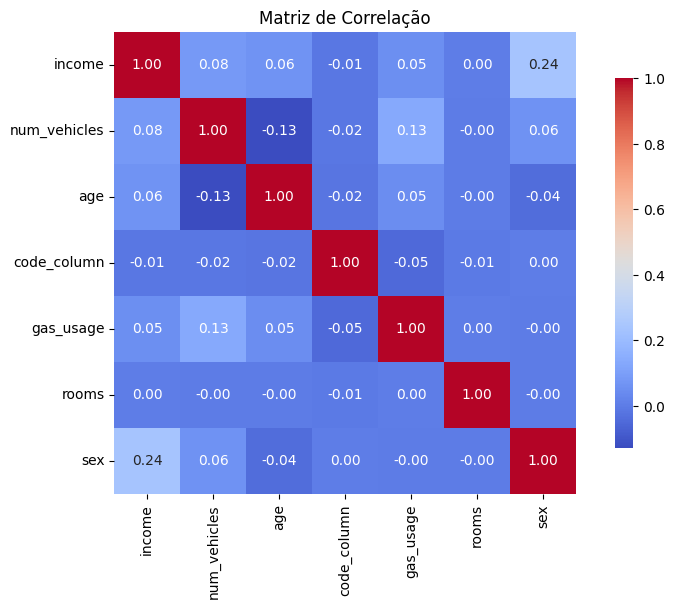

In [249]:
# Seleciona as colunas de interesse
colunas_interesse = ['income', 'num_vehicles', 'age', 'code_column', 'gas_usage', 'rooms', 'sex']

# Calcula a matriz de correlação
correlacao = df_encoded[colunas_interesse].corr()

# Configura o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Cria um heatmap para visualizar a matriz de correlação
sns.heatmap(correlacao, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlação')
plt.show()


Nenhum par de colunas tem correlação sufeciente para se retirar alguma variável sem perdemos informação.